In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
import pickle

In [2]:
df = pd.read_csv("./foods_ab.csv")
df.shape

(694, 22)

In [2]:
df = pd.read_csv("./nutrition_fin.csv")
#df = df.dropna(axis=0, how="all")
df = df.fillna(0)
df.shape

(1733, 25)

In [390]:
df[df['粗蛋白(g)'] > 50]

,樣品名稱,熱量(kcal),水分(g),粗蛋白(g),粗脂肪(g),飽和脂肪(g),總碳水化合物(g),膳食纖維(g),灰分(g),糖質總量(g),...,鋅(mg),磷(mg),維生素A總量(IU),維生素E總量(mg),葉酸(ug),膽固醇(mg),反式脂肪(mg),脂肪酸M總量(mg),脂肪酸S總量(mg),脂肪酸P總量(mg)
865,日本銀帶鯡魚干,273.3658,30.085,51.7660,5.8010,3.1987,1.8950,0.0,10.4530,0.000,...,5.8873,1606.0917,0.0000,0.530,66.430,449.720,0.0,876.531100,3198.671400,1638.782500
1029,小魚干,335.1720,16.100,69.2000,4.4000,2.0504,0.0000,0.0,12.0000,0.000,...,6.4000,837.0000,26.6664,0.150,0.000,669.400,0.0,601.040000,2050.400000,1756.920000
1030,扁魚,354.2749,18.389,66.2917,7.8946,3.2137,1.0648,0.0,6.3599,0.000,...,5.1819,1798.2868,31.6230,1.510,70.177,295.030,0.0,1951.308282,3213.654822,2729.715842
1032,柴魚,382.5790,10.900,76.5000,6.2000,2.7943,2.6000,0.0,3.8000,0.000,...,2.6000,712.0000,109.9989,2.410,6.000,239.700,0.0,1298.280000,2794.340000,2106.760000
1060,蝦米,263.6610,28.700,57.1000,2.2000,0.7172,0.0000,0.0,12.6000,0.000,...,0.6000,652.0000,56.6661,1.080,0.000,645.400,0.0,633.600000,717.200000,850.080000
1061,金鉤蝦乾,256.7368,33.863,54.6400,2.5969,1.0856,0.0000,0.0,10.6201,1.262,...,2.6510,551.1870,16.9772,1.949,15.403,596.643,0.0,606.246305,1085.556138,867.572352
1098,小卷干,246.4023,33.838,53.2020,2.1319,0.7926,4.6951,0.0,6.1330,0.000,...,3.9973,681.6248,24.7564,2.260,71.620,938.700,0.0,174.922395,792.619101,1164.379823


In [386]:
X['粗蛋白(g)'].max()

76.5

In [397]:
X.drop(1098,inplace = True)

In [385]:
X[X['粗蛋白(g)'] > 40]

,熱量(kcal),水分(g),粗蛋白(g),粗脂肪(g),飽和脂肪(g),總碳水化合物(g),膳食纖維(g),灰分(g),糖質總量(g),鈉(mg),鉀(mg),鈣(mg),鎂(mg),鐵(mg),鋅(mg),磷(mg),維生素A總量(IU),維生素E總量(mg),葉酸(ug),膽固醇(mg)
36,642.9216,4.895,42.5115,53.0000,8.3734,0.0000,1.8761,0.6246,0.000,6.8750,11.4700,26.3200,19.5750,3.0600,2.1950,60.9000,9.9999,21.300,35.770,11.900
622,277.8906,8.609,46.4580,3.6924,1.0225,32.1193,26.5283,9.1213,0.000,387.3930,2674.6350,298.1880,336.0520,14.0610,3.2380,862.5310,32889.2527,2.605,922.530,0.000
864,273.3658,30.085,51.7660,5.8010,3.1987,1.8950,0.0000,10.4530,0.000,1276.2148,855.7016,1722.9454,183.3372,5.6524,5.8873,1606.0917,0.0000,0.530,66.430,449.720
1014,185.7450,60.200,43.5000,0.0000,0.0000,0.0000,0.0000,0.4000,0.000,7.0000,2.0000,46.0000,26.0000,1.5000,1.2000,52.0000,0.0000,0.070,2.000,58.900
1018,445.3866,26.519,46.6270,27.3048,5.6373,0.0000,0.0000,3.5289,0.000,687.7320,464.8830,9.9260,32.4100,1.4900,9.3670,1103.4520,618.9105,10.266,52.845,1267.408
1028,335.1720,16.100,69.2000,4.4000,2.0504,0.0000,0.0000,12.0000,0.000,1753.0000,738.0000,2213.0000,209.0000,6.8000,6.4000,837.0000,26.6664,0.150,0.000,669.400
1029,354.2749,18.389,66.2917,7.8946,3.2137,1.0648,0.0000,6.3599,0.000,406.2059,1011.3307,2803.8397,230.2837,2.7944,5.1819,1798.2868,31.6230,1.510,70.177,295.030
1031,382.5790,10.900,76.5000,6.2000,2.7943,2.6000,0.0000,3.8000,0.000,43.0000,1022.0000,44.0000,105.0000,15.3000,2.6000,712.0000,109.9989,2.410,6.000,239.700
1059,263.6610,28.700,57.1000,2.2000,0.7172,0.0000,0.0000,12.6000,0.000,3186.0000,708.0000,1075.0000,250.0000,4.9000,0.6000,652.0000,56.6661,1.080,0.000,645.400
1060,256.7368,33.863,54.6400,2.5969,1.0856,0.0000,0.0000,10.6201,1.262,2553.3220,530.0540,716.5680,171.7320,9.0350,2.6510,551.1870,16.9772,1.949,15.403,596.643


In [374]:
X.drop(1227,inplace = True)

In [398]:
X.to_csv("./X.csv", encoding="utf-8", index=False)

In [431]:
X = pd.read_csv("./X.csv")

In [7]:
foods_id = []
for food_id in df["樣品編號"]:
    if food_id[:6] not in foods_id:
        foods_id.append(food_id)

In [23]:
dis_df.to_csv("./nutritiona.csv", encoding="utf-8", index=False)

In [8]:
dis_df = pd.DataFrame()      #同食材取一樣
for row in range(len(df)):
    if df.iloc[row][0] in foods_id:
        dis_df = dis_df.append(df.iloc[row])

In [21]:
dis_df

,P/M/S,α-生育酚(mg),α-維生素E當量(α-TE)(mg),α-胡蘿蔔素(ug),β-生育酚(mg),β-胡蘿蔔素(ug),γ-生育酚(mg),δ-生育酚(mg),丙胺酸(Ala)(mg),乳糖(g),...,鋅(mg),錳(mg),鎂(mg),鐵(mg),離胺酸(Lys)(mg),食品分類,飽和脂肪(g),鱈烯酸(20:1)(mg),麥芽糖(g),麩胺酸(Glu)(mg)
0,6.39/1.00/2.61,0.4333,0.5071,0.00,0.0233,0.00,0.6443,0.0067,311.4790,0.0,...,1.2273,0.0,49.3449,1.5693,288.4590,穀物類,0.4163,3.249284,0.0,2158.0287
1,3.33/1.00/1.48,0.1075,0.1306,0.00,0.0275,0.00,0.1200,0.0050,334.7750,0.0,...,0.8260,0.0,55.1850,2.2450,311.6000,穀物類,0.4558,13.666650,0.0,2386.2750
2,3.29/1.00/1.67,0.0720,0.0814,0.00,0.0170,0.00,0.0260,0.0000,318.6610,0.0,...,1.3330,0.0,49.8125,1.1450,269.0830,穀物類,0.3678,7.070396,0.0,2374.5920
3,0,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0,1.1300,0.0500,0.0000,穀物類,0.0000,0.000000,0.0,0.0000
4,5.41/1.87/1.00,0.0750,0.1864,0.00,0.0300,0.00,0.9550,0.3850,1103.6500,0.0,...,2.2825,0.0,107.7500,2.8900,146.6850,穀物類,0.4416,20.274285,0.0,2199.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,0,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0,...,0.0760,0.0,5.0500,0.5400,0.0000,加工調理食品及其他類,0.0000,0.000000,0.0,0.0000
1727,0,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,620.4507,0.0,...,0.0780,0.0,4.8900,0.1400,422.1899,加工調理食品及其他類,0.0000,0.000000,0.0,1071.3556
1728,0,0.0500,0.1060,1634.19,0.0005,6432.64,0.5450,0.0158,154.2500,0.0,...,0.6400,0.0,26.9300,1.0200,139.7500,加工調理食品及其他類,0.1070,1.970000,0.0,361.4100
1729,0,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0,0.0000,0.0000,0.0000,加工調理食品及其他類,0.0000,0.000000,0.0,0.0000


In [9]:
dis_df.shape

(1623, 109)

In [9]:
X = df[["熱量(kcal)","水分(g)","粗蛋白(g)","粗脂肪(g)",'飽和脂肪(g)',"總碳水化合物(g)","膳食纖維(g)","灰分(g)",
        "糖質總量(g)","鈉(mg)","鉀(mg)","鈣(mg)","鎂(mg)","鐵(mg)","鋅(mg)","磷(mg)","維生素A總量(IU)",
        "維生素E總量(mg)","葉酸(ug)","膽固醇(mg)"]]
X.head(5)

,熱量(kcal),水分(g),粗蛋白(g),粗脂肪(g),飽和脂肪(g),總碳水化合物(g),膳食纖維(g),灰分(g),糖質總量(g),鈉(mg),鉀(mg),鈣(mg),鎂(mg),鐵(mg),鋅(mg),磷(mg),維生素A總量(IU),維生素E總量(mg),葉酸(ug),膽固醇(mg)
0,361.8425,12.3023,8.9117,1.5967,0.4163,76.1246,8.9256,1.0647,0.0,14.1587,228.6543,25.6666,49.3449,1.5693,1.2273,154.6765,0.0,1.1076,55.9443,0.0
1,364.6155,12.0900,8.6360,1.7900,0.4558,76.6666,5.9987,0.8174,0.0,7.1850,245.9650,12.6650,55.1850,2.2450,0.8260,129.0950,0.0,0.2600,27.7000,0.0
2,388.8475,5.7330,7.1180,1.3142,0.3678,84.9554,7.2048,0.8794,0.0,9.8300,307.2710,25.2358,49.8125,1.1450,1.3330,165.6990,0.0,0.1150,44.6730,0.0
3,17.7600,95.4800,0.0000,0.0000,0.0000,4.4400,0.0000,0.0800,0.0,17.9600,8.8500,0.5400,1.1300,0.0500,0.0000,5.8600,0.0,0.0000,1.0000,0.0
4,370.1938,12.2600,11.3135,3.6550,0.4416,71.6907,2.2226,1.0808,0.0,1.0000,201.9200,4.7950,107.7500,2.8900,2.2825,164.2900,0.0,1.4450,45.1500,0.0


In [191]:
X

,熱量(kcal),水分(g),粗蛋白(g),粗脂肪(g),飽和脂肪(g),總碳水化合物(g),膳食纖維(g),灰分(g),糖質總量(g),鈉(mg),鉀(mg),鈣(mg),鎂(mg),鐵(mg),鋅(mg),磷(mg),維生素A總量(IU),維生素E總量(mg),葉酸(ug),膽固醇(mg)
0,361.842500,12.302300,8.9117,1.59670,0.4163,76.12460,8.9256,1.064700,0.000,14.158700,228.654300,25.666600,49.3449,1.569300,1.227300,154.6765,0.00,1.1076,55.9443,0.0
1,364.615500,12.090000,8.6360,1.79000,0.4558,76.66660,5.9987,0.817400,0.000,7.185000,245.965000,12.665000,55.1850,2.245000,0.826000,129.0950,0.00,0.2600,27.7000,0.0
2,388.847500,5.733000,7.1180,1.31420,0.3678,84.95540,7.2048,0.879400,0.000,9.830000,307.271000,25.235800,49.8125,1.145000,1.333000,165.6990,0.00,0.1150,44.6730,0.0
3,17.760000,95.480000,0.0000,0.00000,0.0000,4.44000,0.0000,0.080000,0.000,17.960000,8.850000,0.540000,1.1300,0.050000,0.000000,5.8600,0.00,0.0000,1.0000,0.0
4,370.193800,12.260000,11.3135,3.65500,0.4416,71.69070,2.2226,1.080800,0.000,1.000000,201.920000,4.795000,107.7500,2.890000,2.282500,164.2900,0.00,1.4450,45.1500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,75.580000,80.710000,4.0000,0.61000,0.1070,13.88000,4.4250,0.780000,1.520,92.070000,227.290000,26.300000,26.9300,1.020000,0.640000,76.3000,12082.42,0.6120,8.6270,0.0
1729,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.0000,0.000000,0.000,27360.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.00,0.0000,0.0000,0.0
1730,128.487467,0.130000,0.0000,0.00000,0.0000,33.20090,0.0000,0.002433,0.000,0.556667,0.104667,0.503333,0.0000,0.000000,0.000000,0.0000,0.00,0.0000,0.0000,0.0
1731,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.00,0.0000,0.0000,0.0


In [154]:
df

,樣品名稱,熱量(kcal),水分(g),粗蛋白(g),粗脂肪(g),飽和脂肪(g),總碳水化合物(g),膳食纖維(g),灰分(g),糖質總量(g),...,鋅(mg),磷(mg),維生素A總量(IU),維生素E總量(mg),葉酸(ug),膽固醇(mg),反式脂肪(mg),脂肪酸M總量(mg),脂肪酸S總量(mg),脂肪酸P總量(mg)
0,大麥仁,361.842500,12.302300,8.9117,1.59670,0.4163,76.12460,8.9256,1.064700,0.000,...,1.227300,154.6765,0.00,1.1076,55.9443,0.0,0.0,159.639663,416.320365,1020.358361
1,麥片,364.615500,12.090000,8.6360,1.79000,0.4558,76.66660,5.9987,0.817400,0.000,...,0.826000,129.0950,0.00,0.2600,27.7000,0.0,0.0,307.781550,455.782330,1026.427170
2,大麥仁粉,388.847500,5.733000,7.1180,1.31420,0.3678,84.95540,7.2048,0.879400,0.000,...,1.333000,165.6990,0.00,0.1150,44.6730,0.0,0.0,220.851310,367.844580,725.530394
3,麥茶,17.760000,95.480000,0.0000,0.00000,0.0000,4.44000,0.0000,0.080000,0.000,...,0.000000,5.8600,0.00,0.0000,1.0000,0.0,0.0,0.000000,0.000000,0.000000
4,小米,370.193800,12.260000,11.3135,3.65500,0.4416,71.69070,2.2226,1.080800,0.000,...,2.282500,164.2900,0.00,1.4450,45.1500,0.0,0.0,826.417430,441.600755,2386.967195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,三色豆,75.580000,80.710000,4.0000,0.61000,0.1070,13.88000,4.4250,0.780000,1.520,...,0.640000,76.3000,12082.42,0.6120,8.6270,0.0,0.0,144.260000,107.720000,225.010000
1729,蘇打粉,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.0000,0.000000,0.000,...,0.000000,0.0000,0.00,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000
1730,糖水,128.487467,0.130000,0.0000,0.00000,0.0000,33.20090,0.0000,0.002433,0.000,...,0.000000,0.0000,0.00,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000
1731,水,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.0000,0.000000,0.000,...,0.000000,0.0000,0.00,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000


In [151]:
X

array([[4.02537423e-01, 1.23096858e-01, 1.16492810e-01, ...,
        2.38199286e-04, 4.36012283e-02, 0.00000000e+00],
       [4.05622291e-01, 1.20972584e-01, 1.12888889e-01, ...,
        5.59153253e-05, 2.15885090e-02, 0.00000000e+00],
       [4.32579564e-01, 5.73644187e-02, 9.30457516e-02, ...,
        2.47317785e-05, 3.48167315e-02, 0.00000000e+00],
       ...,
       [1.42937919e-01, 1.30078047e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.18432810e-01, 5.67320261e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [45]:
X.shape

(62412, 24)

In [51]:
X.min()

熱量(kcal)      0.188225
水分(g)         0.062511
粗蛋白(g)        0.022709
粗脂肪(g)        0.002078
飽和脂肪(g)       0.000760
總碳水化合物(g)     0.019898
膳食纖維(g)       0.000000
灰分(g)         0.002934
糖質總量(g)       0.000847
鈉(mg)         0.526405
鉀(mg)         0.495447
鈣(mg)         0.078512
鎂(mg)         0.058832
鐵(mg)         0.003131
鋅(mg)         0.001272
磷(mg)         0.175438
維生素A總量(IU)    0.022757
維生素E總量(mg)    0.001437
葉酸(ug)        0.040749
膽固醇(mg)       0.000000
反式脂肪(mg)      0.000000
脂肪酸M總量(mg)    0.350028
脂肪酸S總量(mg)    0.759593
脂肪酸P總量(mg)    0.932691
dtype: float64

In [227]:
X[:10]

array([[4.02537423e-01, 1.23096858e-01, 1.16492810e-01, 1.59191629e-02,
        4.17050273e-03, 7.61950804e-01, 1.10379010e-01, 1.07145337e-02,
        0.00000000e+00, 4.10776421e-04, 8.79219810e-03, 8.35115007e-03,
        5.48725646e-02, 2.23216318e-02, 2.05261573e-02, 8.60132544e-02,
        0.00000000e+00, 2.38199286e-04, 4.36012283e-02, 0.00000000e+00],
       [4.05622291e-01, 1.20972584e-01, 1.12888889e-01, 1.78463717e-02,
        4.56621462e-03, 7.67375823e-01, 7.41833121e-02, 8.22584752e-03,
        0.00000000e+00, 2.08453360e-04, 9.45782785e-03, 4.12081521e-03,
        6.13668784e-02, 3.19327492e-02, 1.38145571e-02, 7.17877704e-02,
        0.00000000e+00, 5.59153253e-05, 2.15885090e-02, 0.00000000e+00],
       [4.32579564e-01, 5.73644187e-02, 9.30457516e-02, 1.31026266e-02,
        3.68462865e-03, 8.50340565e-01, 8.90986258e-02, 8.84978016e-03,
        0.00000000e+00, 2.85190887e-04, 1.18151616e-02, 8.21098053e-03,
        5.53925456e-02, 1.62864133e-02, 2.22939524e-02, 9.2142

In [5]:
Xminmax = (X- X.min())/(X.max() - X.min())
Xminmax

,熱量(kcal),水分(g),粗蛋白(g),粗脂肪(g),飽和脂肪(g),總碳水化合物(g),膳食纖維(g),灰分(g),糖質總量(g),鈉(mg),鉀(mg),鈣(mg),鎂(mg),鐵(mg),鋅(mg),磷(mg),維生素A總量(IU),維生素E總量(mg),葉酸(ug),膽固醇(mg)
0,0.402537,0.123097,0.116493,0.015919,0.004171,0.761951,0.110379,0.010715,0.000000,0.000411,8.792198e-03,0.008351,0.054873,0.022322,0.020526,0.086013,0.00000,0.000238,0.043601,0.0
1,0.405622,0.120973,0.112889,0.017846,0.004566,0.767376,0.074183,0.008226,0.000000,0.000208,9.457828e-03,0.004121,0.061367,0.031933,0.013815,0.071788,0.00000,0.000056,0.021589,0.0
2,0.432580,0.057364,0.093046,0.013103,0.003685,0.850341,0.089099,0.008850,0.000000,0.000285,1.181516e-02,0.008211,0.055393,0.016286,0.022294,0.092143,0.00000,0.000025,0.034817,0.0
3,0.019757,0.955373,0.000000,0.000000,0.000000,0.044441,0.000000,0.000805,0.000000,0.000521,3.402995e-04,0.000176,0.001257,0.000711,0.000000,0.003259,0.00000,0.000000,0.000779,0.0
4,0.411828,0.122674,0.147889,0.036440,0.004424,0.717571,0.027486,0.010877,0.000000,0.000029,7.764213e-03,0.001560,0.119820,0.041107,0.038174,0.091359,0.00000,0.000311,0.035188,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0.084080,0.807585,0.052288,0.006082,0.001072,0.138929,0.054722,0.007849,0.015093,0.002671,8.739738e-03,0.008557,0.029947,0.014508,0.010704,0.042429,0.06209,0.000132,0.006724,0.0
1729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.793776,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1730,0.142938,0.001301,0.000000,0.000000,0.000000,0.332316,0.000000,0.000024,0.000000,0.000016,4.024635e-06,0.000164,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0


In [62]:
X.

熱量(kcal)      inf
水分(g)         inf
粗蛋白(g)        inf
粗脂肪(g)        inf
飽和脂肪(g)       inf
總碳水化合物(g)     inf
膳食纖維(g)       inf
灰分(g)         inf
糖質總量(g)       inf
鈉(mg)         inf
鉀(mg)         inf
鈣(mg)         inf
鎂(mg)         inf
鐵(mg)         inf
鋅(mg)         inf
磷(mg)         inf
維生素A總量(IU)    inf
維生素E總量(mg)    inf
葉酸(ug)        inf
膽固醇(mg)       inf
反式脂肪(mg)      inf
脂肪酸M總量(mg)    inf
脂肪酸S總量(mg)    inf
脂肪酸P總量(mg)    inf
dtype: float64

In [92]:
X

array([[9.21054432e-02, 7.12704698e-03, 6.84091946e-02, ...,
        1.51098177e-02, 7.12705643e-03, 2.60279610e-02],
       [7.74337172e-02, 1.37504927e-02, 1.34232275e-02, ...,
        2.11758724e-02, 1.37504367e-02, 2.53427354e-02],
       [7.51526651e-02, 3.96828640e-02, 9.87136944e-02, ...,
        3.96830903e-02, 3.96827684e-02, 2.43323775e-02],
       ...,
       [5.86993995e-02, 5.35421459e-02, 2.00676170e-01, ...,
        2.42183032e-01, 5.35418901e-02, 4.95984825e-02],
       [5.64431148e-02, 3.66293544e-03, 1.25376446e-01, ...,
        4.56845549e-03, 3.66288129e-03, 7.83272218e-03],
       [5.43633999e-02, 1.12675465e-03, 1.35376995e-01, ...,
        2.16918148e-04, 1.12707394e-03, 1.62453079e-03]])

In [101]:
#X.to_csv("./nutrition_train.csv", encoding="utf-8", index=False)

MaxAbsScaler()

In [13]:
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

labels

array([1, 1, 1, ..., 1, 3, 3])

In [15]:
test = df.loc[df["樣品名稱"] == "大麥仁"][["熱量(kcal)","水分(g)","粗蛋白(g)","粗脂肪(g)",'飽和脂肪(g)',"總碳水化合物(g)","膳食纖維(g)","灰分(g)",
        "糖質總量(g)","鈉(mg)","鉀(mg)","鈣(mg)","鎂(mg)","鐵(mg)","鋅(mg)","磷(mg)","維生素A總量(IU)",
        "維生素E總量(mg)","葉酸(ug)","膽固醇(mg)"]]

test = scaler.transform(test)
kmeans.predict(test)

array([2])

In [162]:
pickle.dump(kmeans, open("./nutrition_kmeans_model.sav", "wb"))  
#存成pickle檔(serialize)
#pickle.load() 讀取

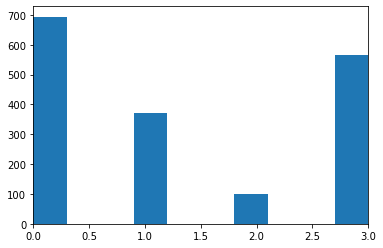

In [16]:
plt.plot
plt.xlim([0, 3])
plt.hist(labels)
plt.show()

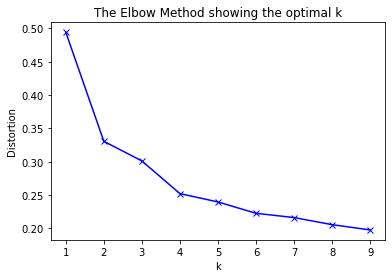

In [17]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

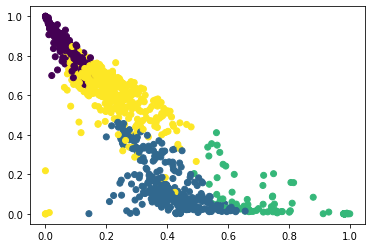

In [29]:
plt.scatter(X[:,0],X[:,1],c=labels, )

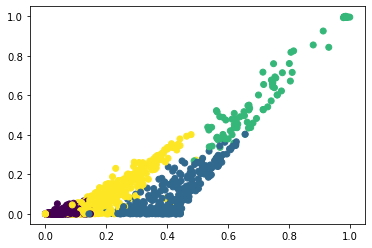

In [30]:
plt.scatter(X[:,0],X[:,3],c=labels)

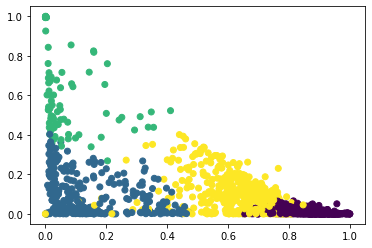

In [31]:
plt.scatter(X[:,1],X[:,3],c=labels)

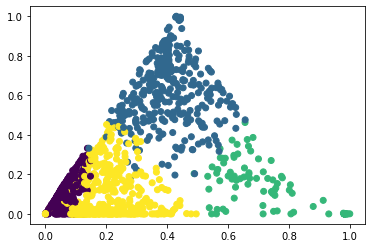

In [38]:
plt.scatter(X[:,0],X[:,5],c=labels)

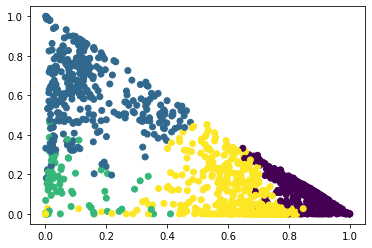

In [33]:
plt.scatter(X[:,1],X[:,5],c=labels)

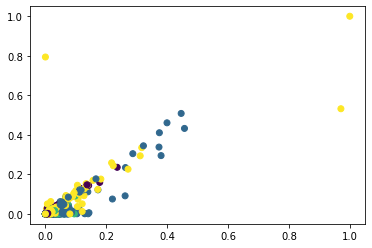

In [39]:
plt.scatter(X[:,7],X[:,9],c=labels)

In [ ]:
0 = p,1 = b,2 = g,3 = y

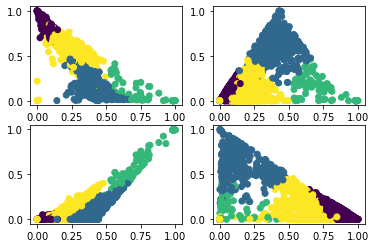

In [22]:
plt.figure()
plt.subplot(221)
plt.scatter(X[:,0],X[:,1],c=labels)

plt.subplot(222)
plt.scatter(X[:,0],X[:,5],c=labels)

plt.subplot(223)
plt.scatter(X[:,0],X[:,3],c=labels)

plt.subplot(224)
plt.scatter(X[:,1],X[:,5],c=labels)

In [12]:
import matplotlib.pyplot as plt